In [26]:
import numpy as np
import cvxpy as cvx
from scipy.optimize import optimize
import IPython as ipy


In [14]:
#Have to define functions that follow DCP rules (Disciplined convex programming)
#List of functions: https://www.cvxpy.org/tutorial/functions/index.html#functions
def g(x):
    y = -cvx.entr(x) #x*log(x)
    #if define y = x*cvx.log(x) then cvx doesn't know convexity and yields error
    return y

In [15]:
def f_divergence(f,p_bernoulli,q_bernoulli):
    # frac = p/q
    # frac1 = (1-p)/(1-q)

    # p_bernoulli = np.array([p,1-p])
    # q_bernoulli = np.array([q,1-q])
    div = cvx.multiply(q_bernoulli,f(p_bernoulli/q_bernoulli))

    return div

In [16]:
def f_inverse(f,q,c):

    '''
    Compute f-inverse using Relative Entropy Programming
    Solves: sup p in [0,1] with D_f(p,q) <= c
    '''   
    p_ber = cvx.Variable(2)
    q_ber = np.array([q,1-q])

    b = f_divergence(f,p_ber,q_ber)
    
    constraints = [c >= cvx.sum(b), 0 <= p_ber[0], p_ber[0] <=1, p_ber[1] == 1.0-p_ber[0]]

    prob = cvx.Problem(cvx.Maximize(p_ber[0]), constraints)

    # Solve problem
    prob.solve(verbose=False, solver=cvx.SCS) # solver=cvx.MOSEK
    
    return p_ber.value[0]

In [17]:
def kl_inverse(q, c):
    '''
    Compute kl inverse using Relative Entropy Programming
    Solves: sup p in [0,1] with KL(p,q) <= c
    '''   
    p_bernoulli = cvx.Variable(2)

    q_bernoulli = np.array([q,1-q])

    constraints = [c >= cvx.sum(cvx.kl_div(p_bernoulli,q_bernoulli)), 0 <= p_bernoulli[0], p_bernoulli[0] <= 1, p_bernoulli[1] == 1.0-p_bernoulli[0]]

    prob = cvx.Problem(cvx.Maximize(p_bernoulli[0]), constraints)

    # Solve problem
    prob.solve(verbose=False, solver=cvx.SCS) # solver=cvx.MOSEK
    
    return p_bernoulli.value[0] 

In [23]:
y = kl_inverse(0.1,0.8)
x = f_inverse(g,0.1,0.8)

In [19]:
#Test f-divergence reduces to KL-divergencce
p_bernoulli = np.array([y,1-y])
q_bernoulli = np.array([0.1,1-0.1])
a = cvx.sum(cvx.kl_div(p_bernoulli,q_bernoulli))
#print(x)
b = f_divergence(g,p_bernoulli,q_bernoulli)
#print(a.value,b.value)


In [20]:
p_bernoulli = cvx.Variable(2)
q_bernoulli = np.array([0.1,1-0.1])
c = 0.8
constraints = [c >= cvx.sum(b)]

In [24]:
p_bernoulli = cvx.Variable(2)
q_bernoulli = np.array([0.1,1-0.1])

ga = cvx.kl_div(p_bernoulli,q_bernoulli)
#frac = np.divide(p_bernoulli,q_bernoulli)
gc = np.array([1/2, 0.5])
gb = -cvx.entr(p_bernoulli/q_bernoulli)

In [61]:
x1 = cvx.Variable()
x2 = 0.5*(x1+1)
x3 = 1/x2
y = [cvx.rel_entr(x1,x2),cvx.log(x3)]
r = sum(y)
r.curvature

'UNKNOWN'

In [60]:
print(cvx.__version__)

1.2.1


In [75]:
func = 'g'
h = eval(func)
h(0.2).value

-0.3218875824868201

In [17]:
x = cvx.Variable()
z = 0.5*(x+1)
y1 = (1-x)/(2*x+2)
y2 = cvx.square(1-cvx.sqrt(x))
y3 = cvx.rel_entr(x,z)+cvx.log(1/z)
y4 = cvx.rel_entr(x,z)+cvx.log(2)-cvx.log1p(x)#y3.log_log_curvature
y5 = 1-2*cvx.sqrt(x)+x
y6 = 1/(x+1)-1/2
y7 = cvx.inv_pos(x)-x
y7.curvature

'CONVEX'

In [1]:
import cvxpy as cvx
import numpy as np
x = 0.5
z1 = cvx.jensen_shannon(x)
z = 0.5*(x+1)
z2 = cvx.rel_entr(x,z)+cvx.log(2)-cvx.log1p(x)
z3 = x*np.log(2*x/(x+1))+np.log(2/(x+1))
print(z1.value,z2.value, z3)

0.08494951839769863 0.08494951839769871 0.08494951839769863


In [19]:
data = np.load('lava_problem_Negative_Log_results_f.npz')
bounds = data['bounds']
print(bounds)

[4.22272467 4.07898729 3.85894258 3.60033298 3.50341384 3.71701506
 3.89402886 4.01311081 4.08654658 4.12403907 4.15821283 4.18923116
 4.21721254 4.24220708 4.26419468 4.28313519 4.29890384 4.31137274
 4.32020401 4.32477747]


In [35]:
import os
fname = os.listdir('results')
print(fname)
path = '/results'
filename = 'x'
os.path.join(path, filename)

['lava_problem_Kullback_Leibler_results_f.npz', 'lava_problem_Negative_Log_results_f.npz', 'lava_problem_Jensen_Shannon_results_f.npz', 'lava_problem_optimal_results.npz', 'lava_problem_Chi_Squared_results_f.npz', 'lava_problem_Total_Variation_results_f.npz', 'lava_problem_Squared_Hellinger_Distance_results_f.npz', 'lava_problem_Neyman_Chi_Squared_results_f.npz']


'/results/x'

['lava_problem_Kullback_Leibler_results_f.npz', 'lava_problem_Negative_Log_results_f.npz', 'lava_problem_Jensen_Shannon_results_f.npz', 'lava_problem_Chi_Squared_results_f.npz', 'lava_problem_Total_Variation_results_f.npz', 'lava_problem_Squared_Hellinger_Distance_results_f.npz', 'lava_problem_Neyman_Chi_Squared_results_f.npz']


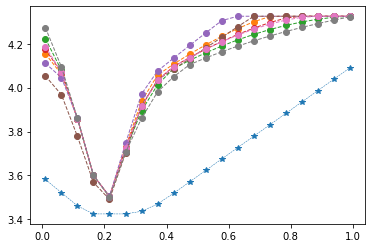

In [33]:
import matplotlib.pyplot as plt
opt_data = np.load("lava_problem_optimal_results.npz")
p_correct_vals = opt_data['p_correct_vals']
opt_values = opt_data['opt_values']

# Load all npz filenames
fname = os.listdir()
npz_name = []
for i in fname:
    if i[-5] == 'f':
        npz_name.append(i)

print (npz_name)
# Plot
fig, ax = plt.subplots()
ax.plot(p_correct_vals, opt_values, '*--', label='POMDP', linewidth=0.5)
for j in npz_name:
    data = np.load(j)
    bounds = data['bounds']
    ax.plot(p_correct_vals, bounds, 'o--', label=j[13:-14], linewidth=1) # function name part -- dependent on file naming


In [30]:
data = np.load(npz_name[4])
print(data.files)

['reward_xs', 'p_correct_vals', 'opt_values']
